## Nethack integration

Trying to integrate nethack with our genetic algorithm.

Generate new environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rules_new import RuleNew, initial_population, print_rule, make_rule_good
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
from utility_func import *
import time

In [2]:
import gym
import minihack

In [3]:
LABYRINTH = False

if not LABYRINTH:

    env=gym.make(
        "MiniHack-Room-Random-15x15-v0",
        observation_keys=("chars", "colors", "specials", "pixel"),
    )

else:

    env = gym.make("MiniHack-MazeWalk-Mapped-15x15-v0", observation_keys=("chars", "colors", "specials", "pixel"))


#env.seed(17)
obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


## Get the submatrix of the env

agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])

print(agent_position)
print(goal_position)
env_indexes = search_environment_indexes(obs["chars"])

## Produce a best rule based on that submatrix 

visualize_environment = {32: ' ', #empy space
                        35: '#', #wall
                        46: '.', #floor
                        62: '>', #door
                        64: '@', #player
                            }


# collect the printed room in a matrix
room = []

for row in obs["chars"]:
    room.append([visualize_environment[char] for char in row])






You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ..........@....                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

# Visualize the environment

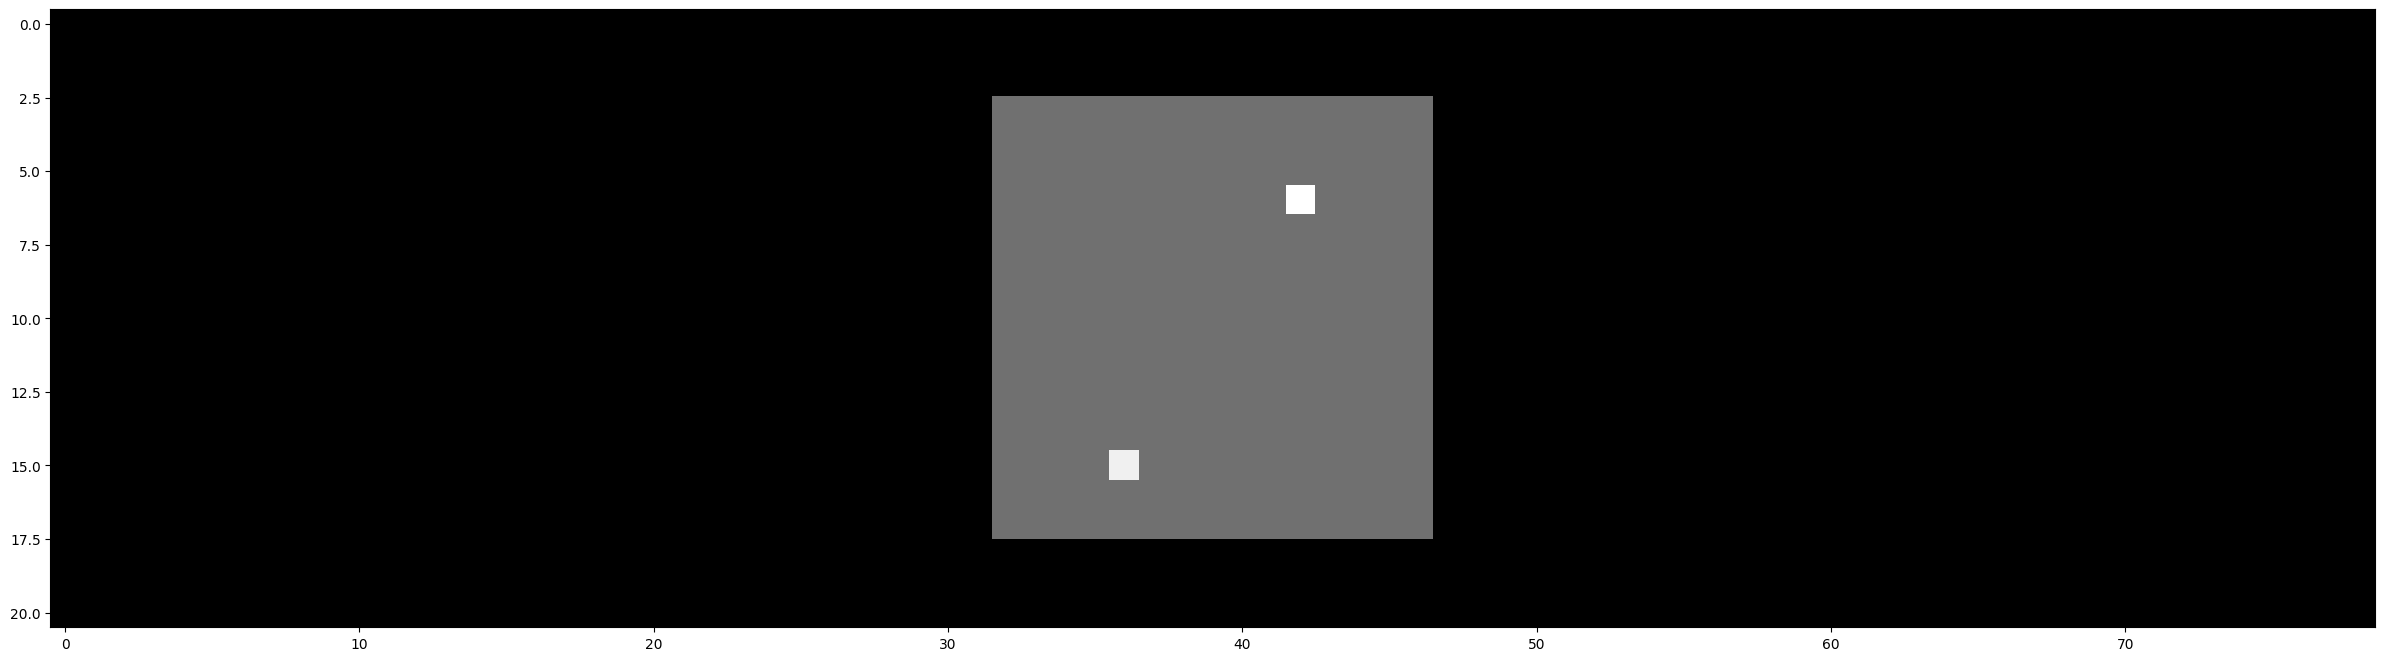

In [4]:
def env_visualize(obs):
    
    fig, ax = plt.subplots()
    im = ax.imshow(obs["chars"], cmap='gray')

    #adjust the size of the figure
    fig.set_size_inches(30,10)


env_visualize(obs)

## Apply genetic algorithm to find the best solution

In [5]:
initial_pop = initial_population(200)
for rule in initial_pop:
    make_rule_good(rule)
# Some shenanigans to make the code work

goal = goal_position[0] - 3, goal_position[1] - 32
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32

print(agent)
print(goal)



(3, 10)
(12, 4)


In [6]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

[[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
 [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9 10]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  9 10]
 [ 7  7  7  7  7  7  7  7  7  7  7  7  8  9 10]
 [ 6  6  6  6  6  6  6  6  6  6  6  7  8  9 10]
 [ 5  5  5  5  5  5  5  5  5  5  6  7  8  9 10]
 [ 4  4  4  4  4  4  4  4  4  5  6  7  8  9 10]
 [ 4  3  3  3  3  3  3  3  4  5  6  7  8  9 10]
 [ 4  3  2  2  2  2  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  1  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  0  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  1  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  2  2  2  2  3  4  5  6  7  8  9 10]]


In [7]:
proximity_score = lambda distance: 1/np.sqrt(distance)
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

69.20478878300821


In [8]:
fitness_list = fitness_list - np.min(fitness_list)

# parallelize code of genetic algorithm 

new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0,
                                                n_iterations=600,
                                                n_rules=300)

print(sum_fitnesses)

100%|██████████| 600/600 [06:55<00:00,  1.44it/s]

[ 1.66284016  3.6922848   5.81385938  7.50042273  9.86558864 11.38339968
 13.13915322 14.75352415 16.38268286 17.93809529 19.75719909 20.82774018
 22.37352857 23.08760201 24.12131341 24.76951589 25.33503719 26.42555223
 27.17228147 28.34952229 28.97344747 29.95392186 30.70092739 31.35373611
 31.55149628 32.34948565 32.78539735 33.51773696 34.03967668 34.86448996
 35.36312091 36.3371013  36.88189091 37.33532902 37.90218381 38.33366121
 38.50770967 39.56128219 39.993667   40.14087966 40.71975255 40.94812699
 41.65510079 42.34238445 42.97440258 43.3164179  43.64064286 44.41878362
 44.63975148 45.28158574 45.61452025 46.24877123 47.14092058 48.20585099
 48.43672707 48.75099843 49.1128688  49.91977019 50.67148419 50.77434333
 50.86191755 51.11502466 51.466708   52.0120938  52.65293765 52.49611895
 52.95824431 52.92174159 53.35269071 53.74214636 54.09966178 54.61488914
 55.16454389 55.71824823 56.27367721 56.68048837 56.68903315 56.90654984
 57.04846337 57.08900166 56.94310894 57.16107853 57

In [9]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

↘ → ↓ → ↘ ↙ ↓ ↙ ← ↓ ↓ ↙ ↘ ↙ ↙ 
↘ → ↓ ↓ ↘ ↙ ↘ ↙ ↓ ↓ ↓ ↘ ↘ ↙ ↙ 
→ ↘ ↘ ↓ ↓ ↙ ↓ ↘ ↙ ← ↘ ↘ ↓ → ← 
↓ ↘ ↙ ↘ ↓ ↘ ↘ ↓ ↓ ↓ ↘ ↓ ↓ ↙ ← 
↘ ↙ ↙ ↓ ↙ ↙ ↓ ↘ → ↙ ↓ ↓ ← ↓ ↖ 
↘ ↙ ↙ ↘ ↘ ↓ ↙ ↘ ↓ ← ↙ ↓ ↙ ← ↖ 
↘ ↙ → ↓ ↙ ↙ ↙ ↘ ↓ ↙ ↙ ← ← ← ← 
↓ ↘ ↘ ↘ ↓ ↓ ↘ ↙ ↓ ↗ ↙ ← ↙ ↖ ↖ 
↘ ↘ ↙ ↘ ↘ ↙ ↘ ↙ ↓ ↙ ← ↙ ↙ ↘ ← 
↘ ↘ ← ↙ ↙ ↘ ↘ ↙ ↙ ↖ ↓ ↙ ↑ ↙ ↙ 
↗ ↘ ↘ ↓ ↙ ↓ ↙ ← ← ↙ ↙ ↖ ↙ ↖ ↙ 
→ ↘ ↓ ↘ ↓ ↙ ↖ ↙ ↙ ← ↙ ↙ ← ← ↖ 
↗ ↓ ↗ → → ← ← ↙ ↙ ↙ ← ← ← ↙ ↙ 
↘ ↗ ↗ ↗ ↑ ↖ ← ↖ ↖ ← ← ↖ ← ← ↙ 
→ ↗ ↗ ↗ ↑ ↑ ↖ ← ↖ ↖ ↖ ↖ ↑ ← ← 


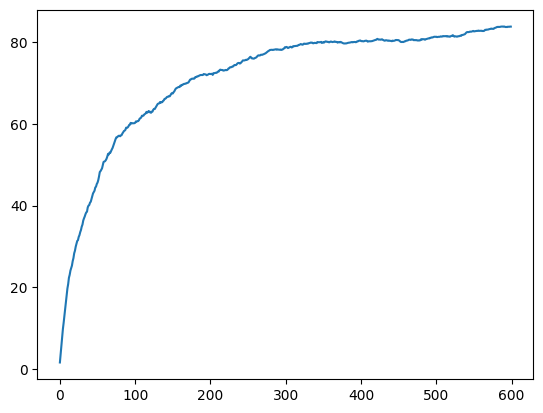

In [10]:
plt.plot(sum_fitnesses)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fitness_new import *

FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)


# Replace this with your actual matrix of scores
# For demonstration purposes, let's create a random matrix
matrix_of_scores = score_matrix 

[[ 0.28867513  0.          0.28867513  0.          0.28867513  0.28867513
   0.28867513  0.28867513  0.          0.28867513  0.28867513  0.28867513
   0.28867513  0.28867513  0.28867513]
 [ 0.30151134  0.          0.30151134  0.30151134  0.30151134  0.30151134
   0.30151134  0.30151134  0.30151134  0.30151134  0.30151134  0.30151134
   0.30151134  0.30151134  0.30151134]
 [ 0.          0.31622777  0.31622777  0.31622777  0.31622777  0.31622777
   0.31622777  0.31622777  0.31622777  0.          0.31622777  0.31622777
   0.31622777  0.          0.        ]
 [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
   0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
   0.33333333  0.33333333  0.31622777]
 [ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339  0.          0.35355339  0.35355339  0.35355339
   0.          0.          0.31622777]
 [ 0.37796447  0.37796447  0.37796447  0.37796447  0.37796447  0.

## Colormap

goal


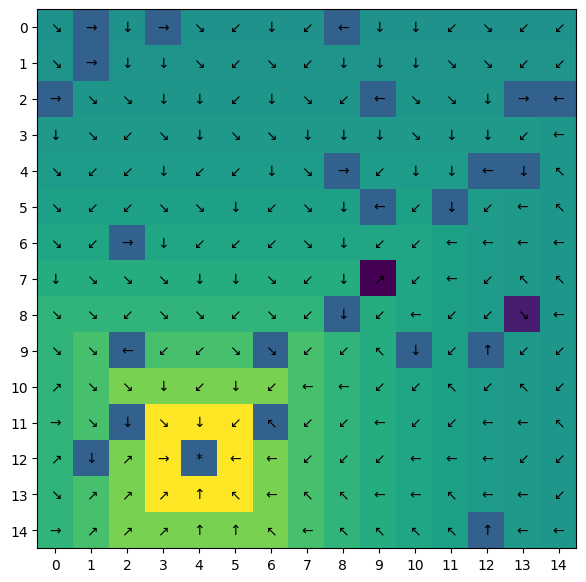

In [12]:
arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)


#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

for i in range(15):
    for j in range(15):
        if (i, j) == goal:
            print("goal")
            ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
        else:
            ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')


# Visualizing movement


In [13]:
#wall is all 35 in obs["chars"] matrix
def visualize_movement(score_matrix, best_rule, goal, agent, num_move):
    
    arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
    }

    # Replace these with your actual matrices and alphanumeric arrow values
    matrix_of_scores = score_matrix
    arrows_list = []

    # Fill with all the right movements from print_rule(best_rule)
    for i in range(15):
        for j in range(15):
            arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

    fig, ax = plt.subplots()
    im = ax.imshow(matrix_of_scores)


    #adjust the size of the figure
    fig.set_size_inches(12, 7)

    ax.set_xticks(np.arange(15))
    ax.set_yticks(np.arange(15))

    for i in range(15):
        for j in range(15):
            if (i, j) == goal:
                print("goal")
                ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
            elif (i, j) == agent:
                ax.annotate("@", xy=(j, i), ha='center', va='center', color='black')
            else:
                ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')

    # save in a folder for each movement with a different number in a folder called gif

    plt.savefig(f"gif/{num_move}.png")


In [14]:
from rules_new import *
#env.seed(17)
obs=env.reset()
env.render()
agent_position = search_environment_agent_position(obs["chars"])
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ............@..                                 
                                ...............                                 
                           

Goal position: (12, 4)
Agent position: (6, 12)
goal

                                                                                
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...........@<..                                 
                                ...............         

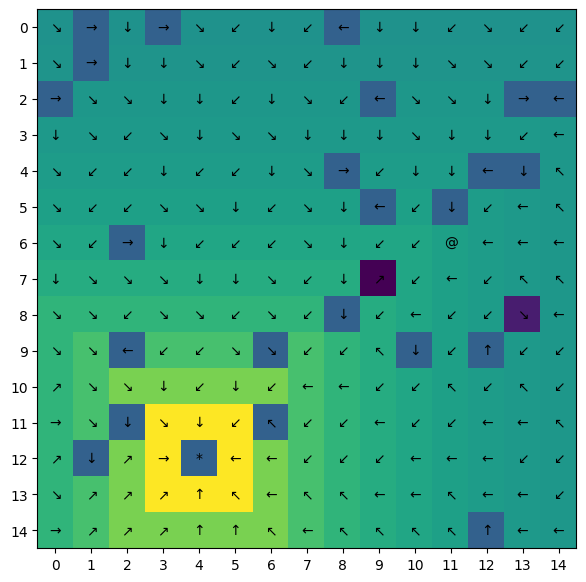

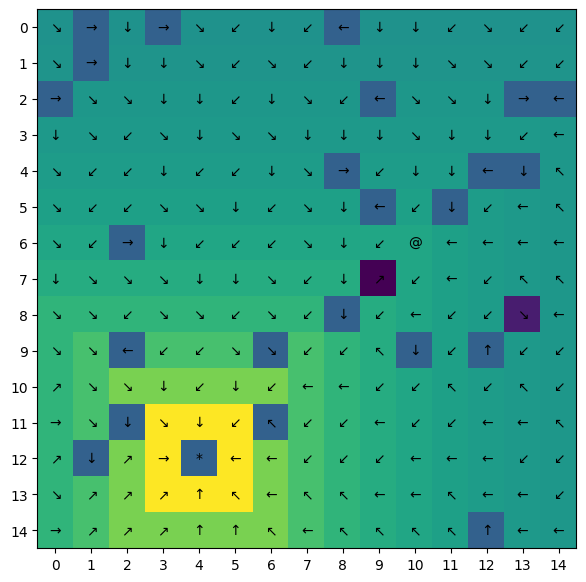

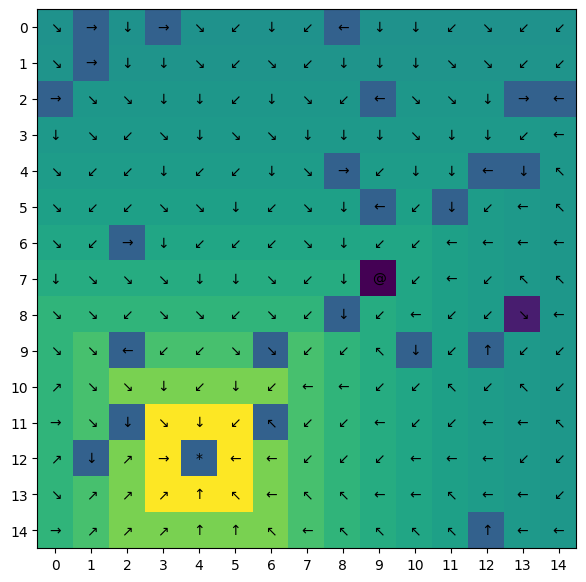

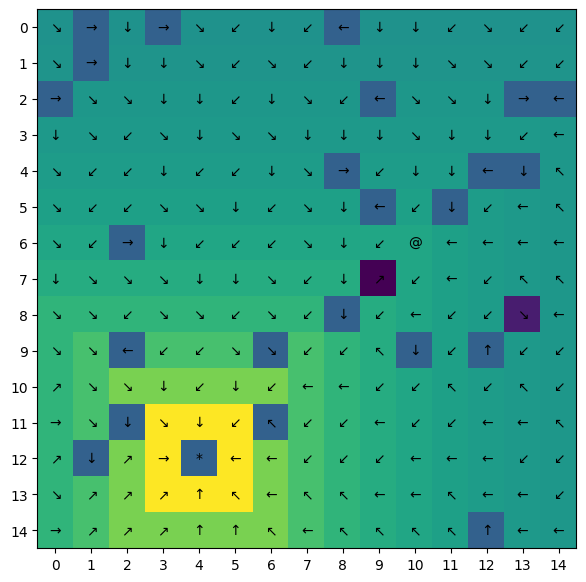

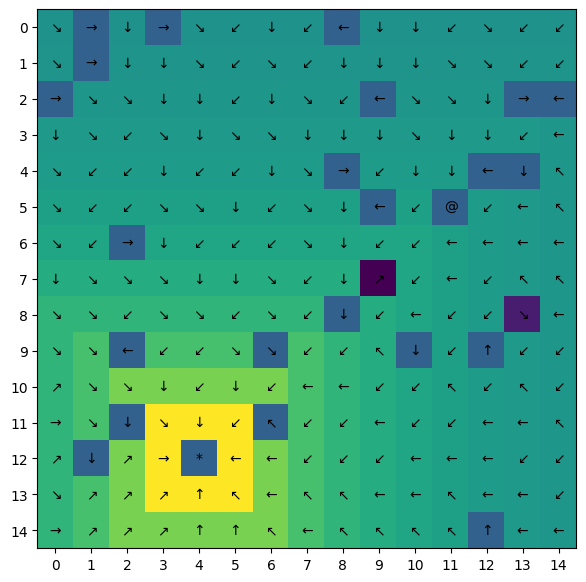

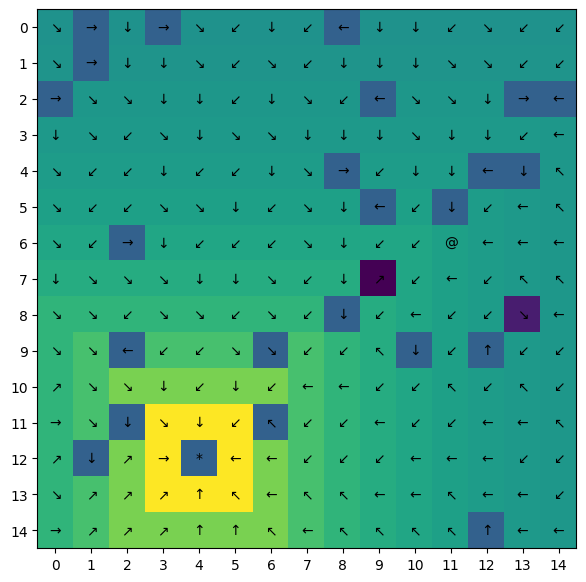

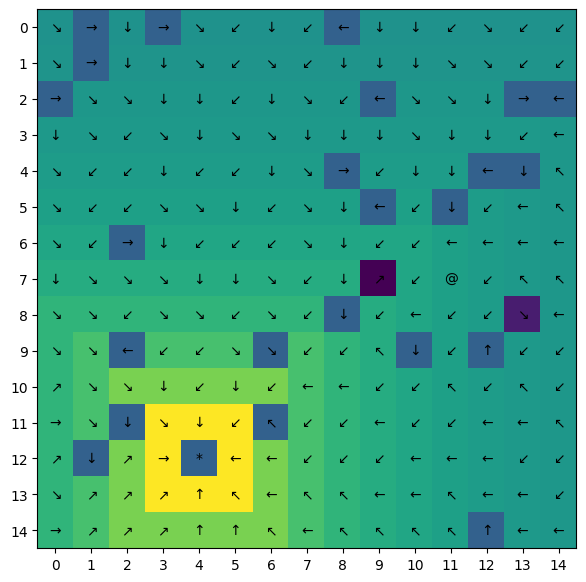

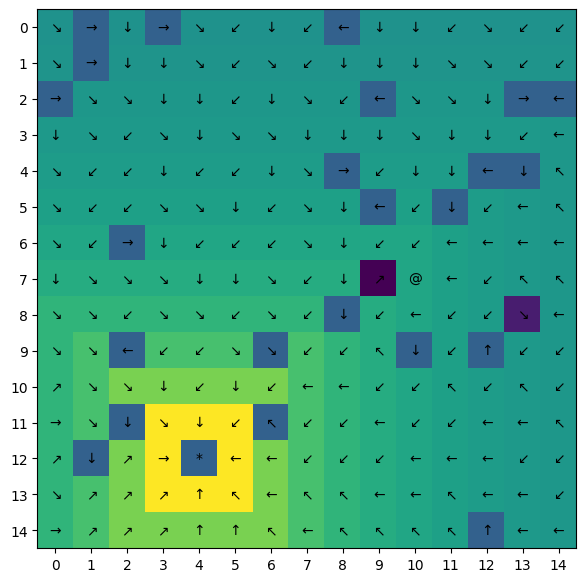

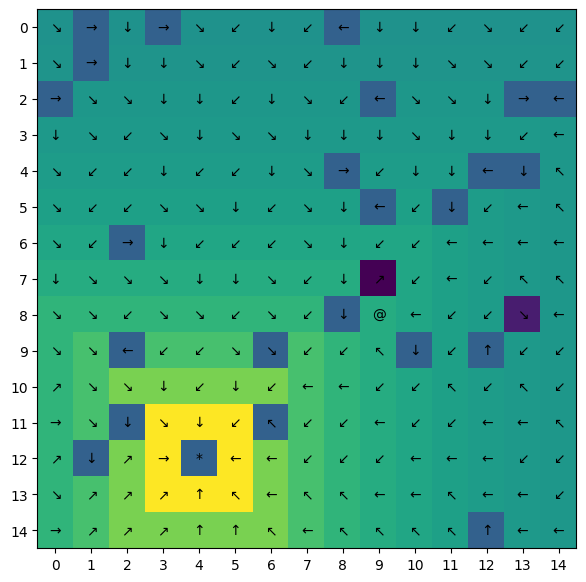

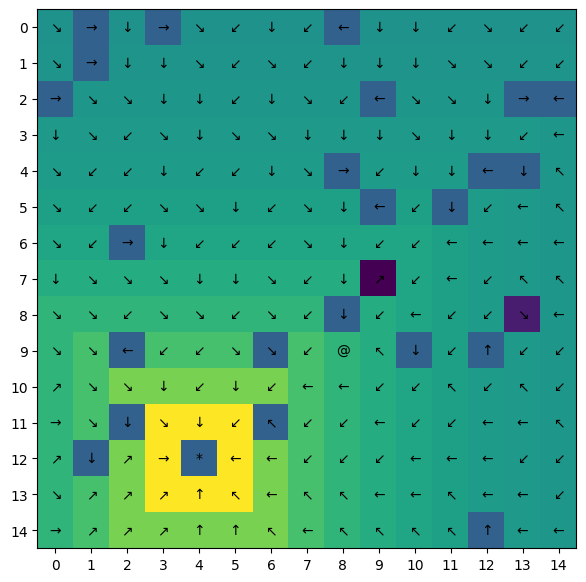

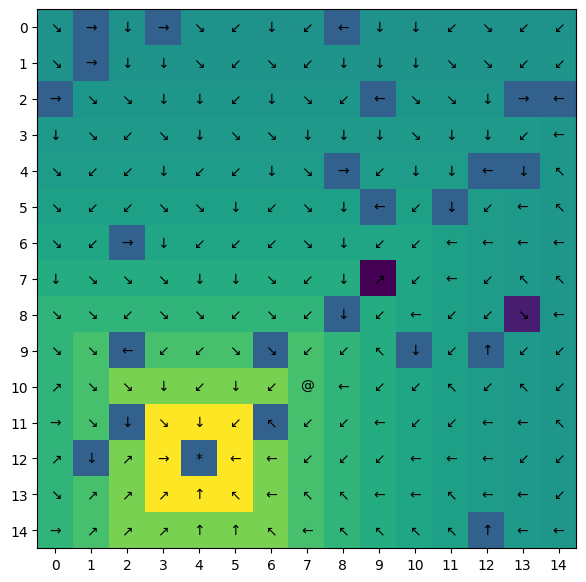

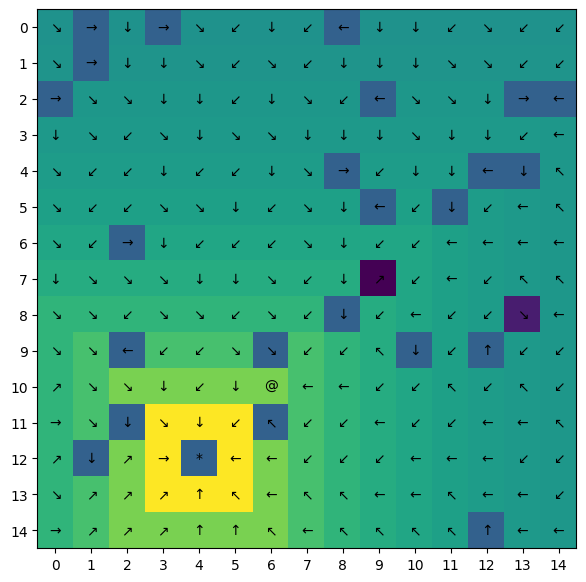

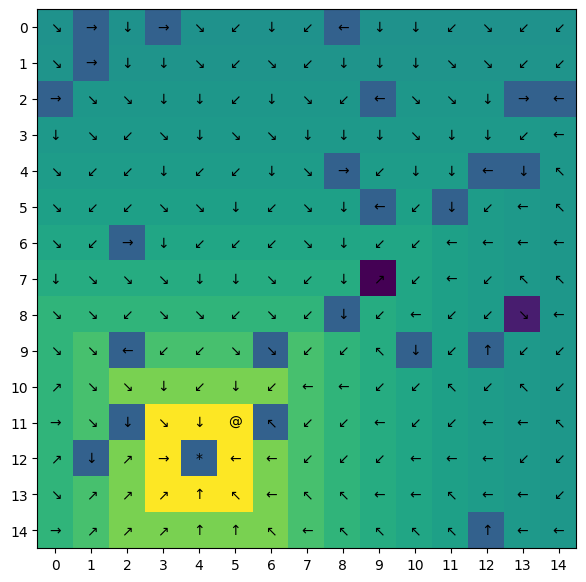

In [15]:
## Apply the rule to the env (env.step) until the goal is reached

print("Goal position:", goal)
visited_position=np.zeros(shape=(15,15), dtype=int)
total_step=0

while agent != goal:
    
    print("Agent position:", agent)
    
    x, y = agent
    
    if visited_position[x][y]==1:
        movement=np.random.randint(0,7)
        while not good_movement((x,y), movement):
            movement = np.random.randint(0, 7)  # mutation
        env.step(movement)
    else:
        movement = best_rule.get_movement(x, y)
        env.step(movement)

    agent = (agent[0] + int_to_coord[movement][0], 
                        agent[1] + int_to_coord[movement][1])
   
    visited_position[x][y]=1
    total_step+=1

    if agent == goal:
        print("Goal reached!")
        break

    visualize_movement(score_matrix, best_rule, goal, agent, total_step) 

    env.render()

print(total_step)

# create a gif with manim



# Rendering the solution

Careful here change python enviroment with one that has manimCE working


In [3]:
from manim import *

Manim Community v0.17.3

In [24]:
%%manim -qm -v WARNING GifFromImages

#%%manim -qm -v WARNING GifFromImages

class GifFromImages(Scene):

    def construct(self):

        #get images from gif folder
        image_objects = [ImageMobject(f"gif/{i}.png") for i in range(1,14)]

        # Set the initial position of the first image
        image_objects[0].move_to(ORIGIN)

        print(len(image_objects))
        # Add the first image to the scene
        self.add(image_objects[0])

        # Define the time delay between images
        delay_between_images = 0.5  # Adjust this as needed

        # Iterate through the images and display them sequentially
        for i in range(0, len(image_objects)):
            self.wait(delay_between_images)  # Wait for the specified delay
            self.remove(image_objects[i - 1])  # Remove the previous image
            self.add(image_objects[i])  # Add the current image
            #add last image
            if i == len(image_objects)-1:
                self.wait(0.3)
                self.remove(image_objects[i])
                self.add(image_objects[0])



13
